# **Madrid Restaurante**
## Todos los restaurantes de Madrid
Importamos de Geopandas un data set con la información de 4600 restaurantes.

---
---
# **RESTAURANTES**

## **Importamos** librerías y el dataset de GeoPandas.

In [23]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Cargar archivo GeoJSON
resto = gpd.read_file("C:/Users/34666/Documents/MASTER EN IA/THE BRIDGE/REPO_CLASE/REPO_PRACTICE/EDA/RESTAURANTS/data/export.geojson")


---
## **Limpiamos** el dataset.
#### Nos quedamos con el **name** y la **geolocalización**.
#### Está ya en CRS 4326 (grados)

In [2]:
# Umbral: 30% de valores nulos.
umbral = 0.3

# Calcular porcentaje de nulos por columna.
porcentaje_nulos = resto.isnull().mean()

# Filtrar columnas que tienen menos o igual al 30% de nulos.
columnas_buenas = porcentaje_nulos[porcentaje_nulos <= umbral].index

# Crear nuevo DataFrame con solo las columnas buenas.
resto_cleaned = resto[columnas_buenas].copy()

# Borramos el resto de columnas que no nos interesan.
resto_cleaned = resto_cleaned.drop(["id", "@id", "amenity"], axis=1)

# Eliminamos las filas que contienen NaN en su columna de "name".
resto_cleaned = resto_cleaned.dropna(subset="name")

# Eliminamos la fila de coordenadas que no corresponden.
resto_cleaned = resto_cleaned[~(resto_cleaned.geometry.x < -4)]

# Ordenamos el df.
resto_cleaned = resto_cleaned.sort_values(by="name").reset_index().drop(columns="index")

print(resto_cleaned.crs)
resto_cleaned.head(2)

EPSG:4326


,name,geometry
0,#PORNEAT,POINT (-3.65242 40.42949)
1,100 Montaditos,POINT (-3.69574 40.37103)


---
## **Convertimos** a GeoDataFrame (a diferentes escalas)

In [3]:
# Conviertimos a web mercator.
gdf_resto_wm = resto_cleaned.to_crs(epsg=3857)

# Conviertimos a metros.
gdf_resto_metros = resto_cleaned.to_crs(epsg=25830)

print(gdf_resto_metros.crs)
gdf_resto_metros.head(2)

EPSG:25830


,name,geometry
0,#PORNEAT,POINT (444659.559 4475632.463)
1,100 Montaditos,POINT (440933.921 4469171.862)


---
## **Pintamos** todos los restaurantes en el gráfico del mapa
#### Usamos el **web mercartor**.

In [4]:
import contextily as ctx

print(ctx.__version__)
print(gdf_resto_wm.geometry.total_bounds)

1.6.2
[-424778.23404063 4914895.19804772 -393382.69786466 4947506.19846259]


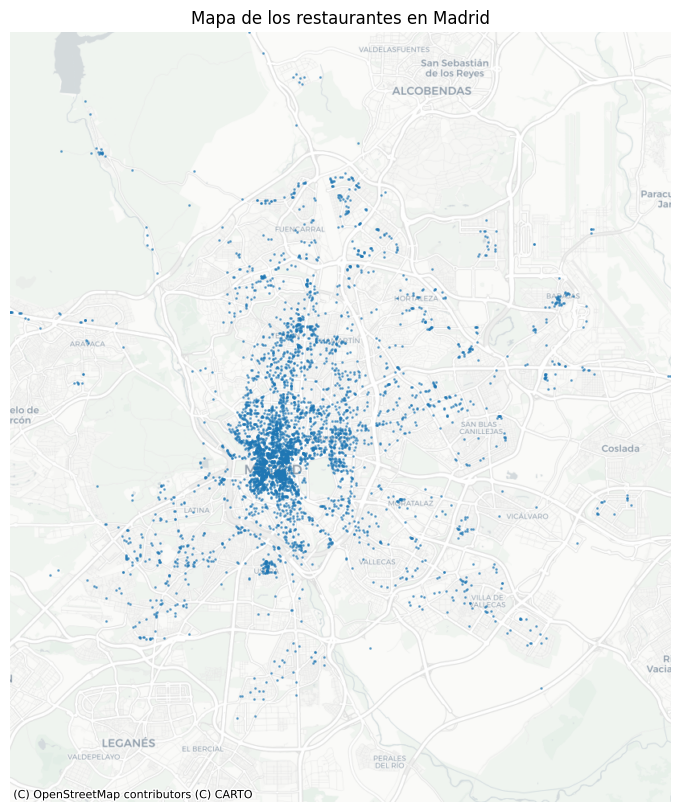

In [5]:
ax = gdf_resto_wm.plot(figsize=(10, 10), alpha=0.5, markersize=1)

# Coordenadas para ver toda la ciudad de Madrid con un poco más de margen
ax.set_xlim([-424778.23404063, -393382.69786466])
ax.set_ylim([4910895.19804772, 4947506.19846259])

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.axis('off')
plt.title("Mapa de los restaurantes en Madrid")

# Guardar imagen del gráfico.
plt.savefig("img/export_by_vsc/Madrid_mapa_restaurantes.png", dpi=150, bbox_inches='tight')

plt.show()

---
---
# **DISTRITOS**

## **Importamos** las coordenadas de los distritos de Madrid

In [6]:
# Longitud y Latitud de
distritos_coords = pd.DataFrame([
    {'cod_distrito': 1, 'distrito': 'Centro',       'latitud': 40.4165, 'longitud': -3.7039},
    {'cod_distrito': 2, 'distrito': 'Arganzuela',   'latitud': 40.3989, 'longitud': -3.6975},
    {'cod_distrito': 3, 'distrito': 'Retiro',       'latitud': 40.4110, 'longitud': -3.6767},
    {'cod_distrito': 4, 'distrito': 'Salamanca',    'latitud': 40.4297, 'longitud': -3.6780},
    {'cod_distrito': 5, 'distrito': 'Chamartín',    'latitud': 40.4518, 'longitud': -3.6781},
    {'cod_distrito': 6, 'distrito': 'Tetuán',       'latitud': 40.4582, 'longitud': -3.7033},
    {'cod_distrito': 7, 'distrito': 'Chamberí',     'latitud': 40.4336, 'longitud': -3.7037},
    {'cod_distrito': 8, 'distrito': 'Fuencarral-El Pardo', 'latitud': 40.5021, 'longitud': -3.7084},
    {'cod_distrito': 9, 'distrito': 'Moncloa-Aravaca','latitud': 40.4381, 'longitud': -3.7280},
    {'cod_distrito':10, 'distrito': 'Latina',        'latitud': 40.3967, 'longitud': -3.7450},
    {'cod_distrito':11, 'distrito': 'Carabanchel',   'latitud': 40.3823, 'longitud': -3.7409},
    {'cod_distrito':12, 'distrito': 'Usera',         'latitud': 40.3810, 'longitud': -3.7072},
    {'cod_distrito':13, 'distrito': 'Puente de Vallecas','latitud': 40.3851, 'longitud': -3.6622},
    {'cod_distrito':14, 'distrito': 'Moratalaz',     'latitud': 40.4076, 'longitud': -3.6454},
    {'cod_distrito':15, 'distrito': 'Ciudad Lineal', 'latitud': 40.4455, 'longitud': -3.6517},
    {'cod_distrito':16, 'distrito': 'Hortaleza',     'latitud': 40.4746, 'longitud': -3.6457},
    {'cod_distrito':17, 'distrito': 'Villaverde',    'latitud': 40.3401, 'longitud': -3.6921},
    {'cod_distrito':18, 'distrito': 'Villa de Vallecas','latitud': 40.3754, 'longitud': -3.6279},
    {'cod_distrito':19, 'distrito': 'Vicálvaro',     'latitud': 40.4008, 'longitud': -3.6010},
    {'cod_distrito':20, 'distrito': 'San Blas-Canillejas','latitud': 40.4397, 'longitud': -3.6156},
    {'cod_distrito':21, 'distrito': 'Barajas',       'latitud': 40.4719, 'longitud': -3.5795}
])

---
## **Convertimos** las coordenadas de los distritos de Madrid a GeoDataFrame

In [7]:
# Creamos geometría de distrito y GeoDataFrame a grados

distritos_coords['geometry_district'] = distritos_coords.apply(
    lambda row: Point(row['longitud'], row['latitud']),
    axis=1)

gdf_distritos = gpd.GeoDataFrame(
    distritos_coords,
    geometry='geometry_district',
    crs='EPSG:4326')


In [8]:
# Conviertimos a web mercator.
gdf_distritos_wm = gdf_distritos.to_crs(epsg=3857)

# Conviertimos a metros.
gdf_distritos_metros = gdf_distritos.to_crs(epsg=25830)

print(gdf_distritos_metros.crs)
print(gdf_distritos_metros.info())
gdf_distritos_metros.head(2)


EPSG:25830
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   cod_distrito       21 non-null     int64   
 1   distrito           21 non-null     object  
 2   latitud            21 non-null     float64 
 3   longitud           21 non-null     float64 
 4   geometry_district  21 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 972.0+ bytes
None


,cod_distrito,distrito,latitud,longitud,geometry_district
0,1,Centro,40.4165,-3.7039,POINT (440281.709 4474224.15)
1,2,Arganzuela,40.3989,-3.6975,POINT (440809.267 4472266.255)


---
## **Pintamos** todos los distritos en el gráfico del mapa.
#### Usamos el **web mercator**.

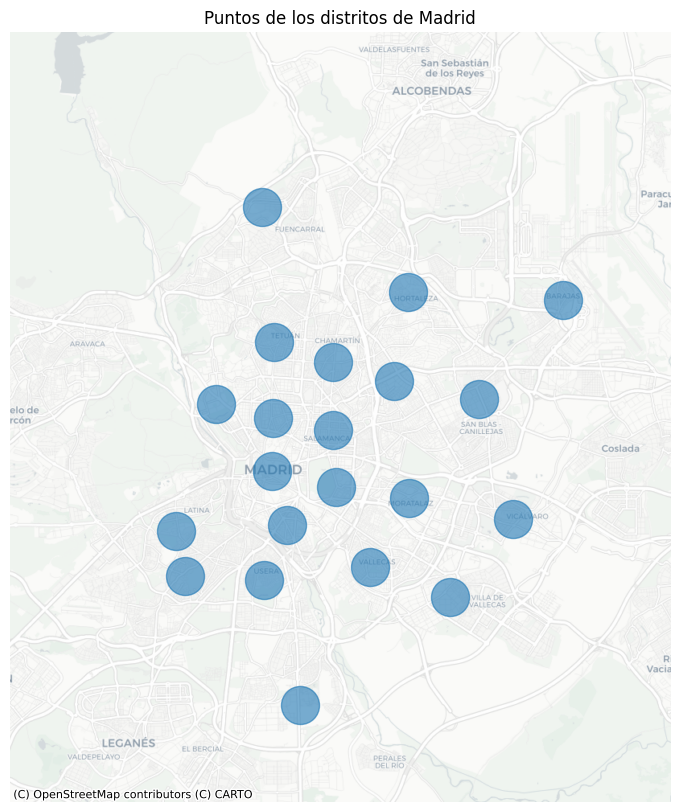

In [9]:
ax = gdf_distritos_wm.plot(figsize=(10, 10),
                           alpha=0.6,
                           markersize=750)

# Coordenadas para ver toda la ciudad de Madrid con un poco más de margen
ax.set_xlim([-424778.23404063, -393382.69786466])
ax.set_ylim([4910895.19804772, 4947506.19846259])

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.axis('off')
plt.title("Puntos de los distritos de Madrid")

# Guardar imagen del gráfico.
plt.savefig("img/export_by_vsc/Madrid_puntos_distritos.png", dpi=150, bbox_inches='tight')

plt.show()

---
---
# **RESTAURANTES vs DISTRITOS**

## **Unimos** los restaurantes con el distrito más cercano.

In [10]:
# Preparamos el GeoDataFrame de distritos con solo lo que necesitas
left_gdf_distritos_metros = gdf_distritos_metros[['cod_distrito','distrito','geometry_district']]

# Unión espacial por el punto más cercano
gdf_union_metros = gpd.sjoin_nearest(
    left_gdf_distritos_metros,
    gdf_resto_metros,
    how='right',
    distance_col='distancia_m')

# Limpia, renombra y ordena columnas
resto_district_metros = (gdf_union_metros.drop(columns=['distancia_m','index_left']))

# Obtenemos un GeoDataFrame en metros con la geometría de los restaurantes.
print(resto_district_metros.crs)
print(resto_district_metros.info())
resto_district_metros.head(2)


EPSG:25830
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4560 entries, 0 to 4559
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cod_distrito  4560 non-null   int64   
 1   distrito      4560 non-null   object  
 2   name          4560 non-null   object  
 3   geometry      4560 non-null   geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 178.1+ KB
None


,cod_distrito,distrito,name,geometry
0,15,Ciudad Lineal,#PORNEAT,POINT (444659.559 4475632.463)
1,12,Usera,100 Montaditos,POINT (440933.921 4469171.862)


---
## **Convertimos** a String
#### El **GeoDataFrame** "resto_district_metros" -> a **DataFrame** "df_resto_district_metros".

In [11]:
df_resto_district_metros = pd.DataFrame(resto_district_metros)

print(df_resto_district_metros.info())
df_resto_district_metros.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 4560 entries, 0 to 4559
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cod_distrito  4560 non-null   int64   
 1   distrito      4560 non-null   object  
 2   name          4560 non-null   object  
 3   geometry      4560 non-null   geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 178.1+ KB
None


,cod_distrito,distrito,name,geometry
0,15,Ciudad Lineal,#PORNEAT,POINT (444659.559 4475632.463)
1,12,Usera,100 Montaditos,POINT (440933.921 4469171.862)


#### El **GeoDataFrame** "gdf_distritos_metros" -> a **DataFrame** "df_distritos_metros".

In [12]:
df_distritos_metros = pd.DataFrame(gdf_distritos_metros)

print(df_distritos_metros.info())
df_distritos_metros.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   cod_distrito       21 non-null     int64   
 1   distrito           21 non-null     object  
 2   latitud            21 non-null     float64 
 3   longitud           21 non-null     float64 
 4   geometry_district  21 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 972.0+ bytes
None


,cod_distrito,distrito,latitud,longitud,geometry_district
0,1,Centro,40.4165,-3.7039,POINT (440281.709 4474224.15)
1,2,Arganzuela,40.3989,-3.6975,POINT (440809.267 4472266.255)


---
## **Cambiamos** la geometría de los restaurantes por la geometría de los distritos

#### Añadimos la columna de "**geometry_district**"

In [13]:
df_resto_district_dos_geos = df_resto_district_metros.merge(df_distritos_metros[['cod_distrito', 'geometry_district']],
                                              on='cod_distrito',
                                              how='left')

print(df_resto_district_dos_geos.info())
df_resto_district_dos_geos.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   cod_distrito       4560 non-null   int64   
 1   distrito           4560 non-null   object  
 2   name               4560 non-null   object  
 3   geometry           4560 non-null   geometry
 4   geometry_district  4560 non-null   geometry
dtypes: geometry(2), int64(1), object(2)
memory usage: 178.3+ KB
None


,cod_distrito,distrito,name,geometry,geometry_district
0,15,Ciudad Lineal,#PORNEAT,POINT (444659.559 4475632.463),POINT (444734.092 4477409.172)
1,12,Usera,100 Montaditos,POINT (440933.921 4469171.862),POINT (439970.214 4470285.911)


#### Limpiamos el DataFrame

In [14]:
# Nombre de la columna que quieres eliminar
col_a_eliminar = 'geometry'

# Nombre de la columna que quieres renombrar como la eliminada
col_a_renombrar = 'geometry_district'

# Eliminar la columna vieja
df_resto_district_dos_geos = df_resto_district_dos_geos.drop(columns=[col_a_eliminar])

# Renombrar la nueva
df_resto_district_dos_geos = df_resto_district_dos_geos.rename(columns={col_a_renombrar: col_a_eliminar})

print(df_resto_district_dos_geos.info())
df_resto_district_dos_geos.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cod_distrito  4560 non-null   int64   
 1   distrito      4560 non-null   object  
 2   name          4560 non-null   object  
 3   geometry      4560 non-null   geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 142.6+ KB
None


,cod_distrito,distrito,name,geometry
0,15,Ciudad Lineal,#PORNEAT,POINT (444734.092 4477409.172)
1,12,Usera,100 Montaditos,POINT (439970.214 4470285.911)


---
## **Convertimos** a GeoDataFrame

In [15]:
# Creamos geometría de distrito y GeoDataFrame a grados
gdf_resto_geo_district_metros = gpd.GeoDataFrame(
    df_resto_district_dos_geos,
    geometry='geometry',
    crs='EPSG:25830')

print(gdf_resto_geo_district_metros.crs)
print(gdf_resto_geo_district_metros.info())
gdf_resto_geo_district_metros.head(2)

EPSG:25830
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cod_distrito  4560 non-null   int64   
 1   distrito      4560 non-null   object  
 2   name          4560 non-null   object  
 3   geometry      4560 non-null   geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 142.6+ KB
None


,cod_distrito,distrito,name,geometry
0,15,Ciudad Lineal,#PORNEAT,POINT (444734.092 4477409.172)
1,12,Usera,100 Montaditos,POINT (439970.214 4470285.911)


In [16]:
# Conviertimos a grados.
gdf_resto_geo_district = gdf_resto_geo_district_metros.to_crs(epsg=4326)

print(gdf_resto_geo_district.crs)
print(gdf_resto_geo_district.info())
print(gdf_resto_geo_district.head(2))
print()

# Conviertimos a web mercator.
gdf_resto_geo_district_wm = gdf_resto_geo_district_metros.to_crs(epsg=3857)

print(gdf_resto_geo_district_wm.crs)
print(gdf_resto_geo_district_wm.info())
gdf_resto_geo_district_wm.head(2)



EPSG:4326
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cod_distrito  4560 non-null   int64   
 1   distrito      4560 non-null   object  
 2   name          4560 non-null   object  
 3   geometry      4560 non-null   geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 142.6+ KB
None
   cod_distrito       distrito            name                 geometry
0            15  Ciudad Lineal        #PORNEAT  POINT (-3.6517 40.4455)
1            12          Usera  100 Montaditos   POINT (-3.7072 40.381)

EPSG:3857
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cod_distrito  4560 non-null   int64   
 1   distrito      4560 non-null   object  
 2   name          4560 n

,cod_distrito,distrito,name,geometry
0,15,Ciudad Lineal,#PORNEAT,POINT (-406505.385 4930893.896)
1,12,Usera,100 Montaditos,POINT (-412683.616 4921463.613)


---
## **Añadimos** la columna "**count**" para nuestro gráfico

#### añadimos una columna con el count por barrio

In [19]:
# resto_por_disctrict = gpd.GeoDataFrame(gdf_resto_geo_district_wm.groupby(["cod_distrito", "distrito", "geometry"],as_index=False)["name"].count())

# Agrupamos y contamos los restaurantes por distrito
resto_por_distrito = gdf_resto_geo_district_wm.groupby(
    ["cod_distrito", "distrito", "geometry"], as_index=False
).agg(num_restaurantes=("name", "count"))

# Aseguramos que sea un GeoDataFrame y que 'geometry' es la columna activa
resto_por_distrito = gpd.GeoDataFrame(resto_por_distrito, geometry='geometry', crs=gdf_resto_geo_district_wm.crs)

print(resto_por_distrito.crs)
print(resto_por_distrito.info())
resto_por_distrito.head(21)

EPSG:3857
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   cod_distrito      21 non-null     int64   
 1   distrito          21 non-null     object  
 2   geometry          21 non-null     geometry
 3   num_restaurantes  21 non-null     int64   
dtypes: geometry(1), int64(2), object(1)
memory usage: 804.0+ bytes
None


,cod_distrito,distrito,geometry,num_restaurantes
0,1,Centro,POINT (-412316.262 4926652.806),1363
1,2,Arganzuela,POINT (-411603.817 4924079.794),243
2,3,Retiro,POINT (-409288.372 4925848.667),136
3,4,Salamanca,POINT (-409433.087 4928583.006),403
4,5,Chamartín,POINT (-409444.219 4931815.479),170
5,6,Tetuán,POINT (-412249.47 4932751.778),371
6,7,Chamberí,POINT (-412293.998 4929153.365),628
7,8,Fuencarral-El Pardo,POINT (-412817.2 4939176.61),180
8,9,Moncloa-Aravaca,POINT (-414999.062 4929811.513),102
9,10,Latina,POINT (-416891.493 4923758.214),108


---
## **Pintamos** el gráfico "Restaurantes por distrito".

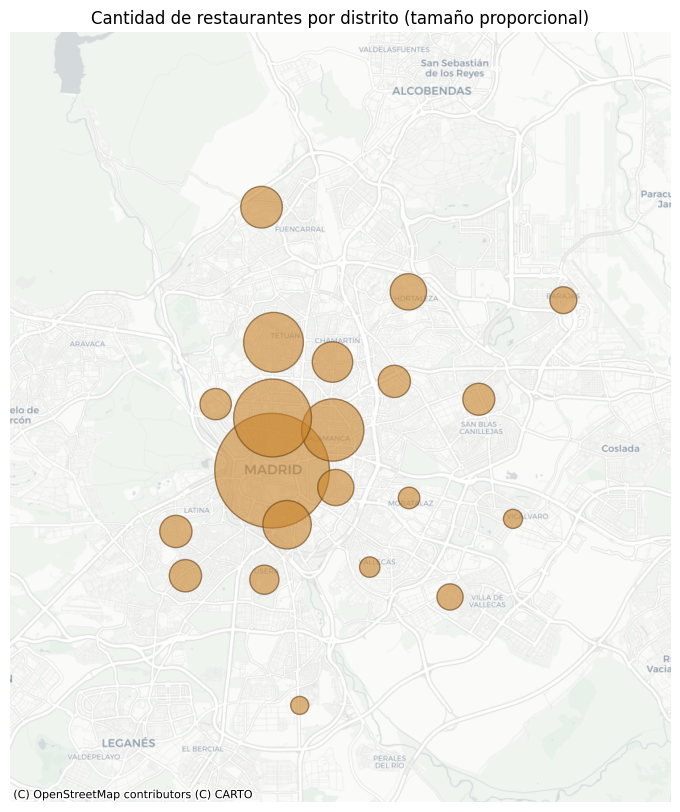

In [21]:
ax = resto_por_distrito.plot(
    figsize=(10, 10),
    alpha=0.6,
    edgecolor="#684116",
    linewidth=1,
    color="#c9842a",
    markersize=resto_por_distrito["num_restaurantes"] * 5) # -> ajusta el valor para más grandes

# for x, y, label in zip(gdf_year.geometry.x,
#                         gdf_year.geometry.y,
#                         gdf_year["distrito"]):
#     ax.text(x, y, label, fontsize=8, ha='center', va='center', color="#684116")

ax.set_xlim([-424778.23404063, -393382.69786466])
ax.set_ylim([4910895.19804772, 4947506.19846259])

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.axis('off')
plt.title("Cantidad de restaurantes por distrito (tamaño proporcional)")

# Guardar imagen del gráfico.
plt.savefig("img/export_by_vsc/resto_por_distrito.png", dpi=150, bbox_inches='tight')

plt.show()

---
## **Guardar** los GeoDataFrame a CSV